In [1]:
# Self Organizing Map
'''
basic theory
In soms the dimensionality of the input dataset is decreased to generally two dimension and this is 
done as neurons are present with random weights in them and each row distance is calculated with the
distance of the neurons and closest neuron is selected and adjusted accordingly......
'''
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [3]:
# Training the SOM
# this minisom is available for usage online, other code can be used to if implementation is good or it can 
# build from scratch
from minisom import MiniSom
# x and y are dimension of the grid i.e. soms, input_len is the number of columns in input dataset,
# sigma is radius of the different neighbourhood in the grid, learning rate how frequently weights
# need to be updated
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X) # initialize the weights of the neurons randomly
som.train_random(data = X, num_iteration = 100)

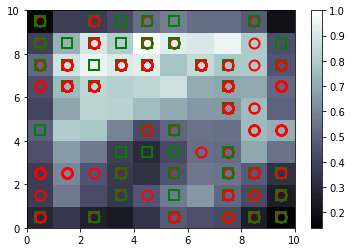

In [4]:
# Visualizing the results
'''
we will visualize all the winning nodes in network. MID(mean inter-neuron distance) of a winning node
is the mean of the distance of all the nodes around the winning  node in its radius. So higher the MID
the node will be further from its neighbour. So a higher MID node is an outlier
'''
# we are not using  matplotlib or any other library as we have to plot a specific map
from pylab import bone, pcolor, colorbar, plot, show
bone() #window which will show the plot
pcolor(som.distance_map().T) #gives MID matrix transpose
colorbar()
markers = ['o', 's']
colors = ['r', 'g'] #red for customers who got approval present in variable y and green who do not got approval
# as people who didn't got approval and are outlier are major fraud
for i, x in enumerate(X):
    w = som.winner(x) # winning node for a specific customer, w is co-ordinate of the winning node x and y
#     but since this is the lower left corner of the square and we want to put the marker in the middle 
# markers[y[i]] is done to check with the orignal dataset that whether customer got approval or not
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [12]:
# Finding the frauds
# win map gives us dictionary of all the customer in the winning node
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,8)], mappings[(8,7)]), axis = 0) #co-ordinates of the possible outliers
'''
to detect outliers the higer MID the more chances of it being an outlier and combining that with
customers who didn't got approval i.e red markers
'''
frauds = sc.inverse_transform(frauds) #since the columns were scaled we need to scale them back

In [13]:
frauds

array([[1.5766183e+07, 0.0000000e+00, 2.4500000e+01, 5.0000000e-01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 8.2500000e+02],
       [1.5808662e+07, 0.0000000e+00, 4.6000000e+01, 4.0000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 9.6100000e+02],
       [1.5684722e+07, 0.0000000e+00, 2.7670000e+01, 1.5000000e+00,
        2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 3.6800000e+02, 1.0000000e+00],
       [1.5734649e+07, 0.0000000e+00, 4.0830000e+01, 1.0000000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.7500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,